In [13]:
from utils.Dataset import DatasetLoader
import cv2
import matplotlib.pyplot as plt
from loss import YOLOLoss
import numpy as np
import tensorflow as tf

In [3]:
class_dict = {
    0: "aeroplane",
    1: "bicycle",
    2: "bird",
    3: "boat",
    4: "bottle",
    5: "bus",
    6: "car",
    7: "cat",
    8: "chair",
    9: "cow",
    10: "diningtable",
    11: "dog",
    12: "horse",
    13: "motorbike",
    14: "person",
    15: "pottedplant",
    16: "sheep",
    17: "sofa",
    18: "train",
    19: "tvmonitor"
}

In [2]:
loader = DatasetLoader('./dataset/train', 448, 7, 20)
train_ds, val_ds = loader.get_dataset(1)

In [20]:
def label_parse(label, img):
    for x_cell in range(7):
        for y_cell in range(7):
            if label[x_cell][y_cell][4] != 0:
                box_info = label[x_cell][y_cell][:4]
                name = np.argmax(label[x_cell][y_cell][5:])
                center_x = box_info[0]
                center_y = box_info[1]

                w = box_info[2]
                h = box_info[3]
                
                c1 = (int(center_x - (w / 2)), int(center_y - (h / 2)))
                c2 = (int(center_x + (w / 2)), int(center_y + (h / 2)))
                
                img = cv2.rectangle(img, c1, c2, (255, 0, 0), 1)
                img = cv2.putText(image, class_dict[name], [c1[0], c1[1] + 25], color=(255, 0, 0), fontFace=cv2.FONT_ITALIC, fontScale=1)
    return img

In [25]:
def convert_to_origin(box, img_size, s):
    batch_size = tf.shape(box)[0]   # get batch size
    
    else_info = box[..., 4:]
    # cell nums
    cell_num = tf.linspace(0., float(s - 1), s)  # [0., 1., 2., 3., 4., 5. ,6.]
    y_cells = tf.zeros(shape=(batch_size, s, s)) + cell_num
    x_cells = tf.transpose(y_cells, perm=[0, 2, 1])

    converted_x = (x_cells * float(img_size // s)) + (box[:, :, :, 0] * float(img_size // s))   # origin center x
    converted_y = (y_cells * float(img_size // s)) + (box[:, :, :, 1] * float(img_size // s))   # origin center y
    converted_w = box[:, :, :, 2] * float(img_size)   # origin center w
    converted_h = box[:, :, :, 3] * float(img_size)   # origin center h
    box_info = tf.stack([converted_x, converted_y, converted_w, converted_h], axis=-1)
    return tf.concat([box_info, else_info], axis=-1)

tf.Tensor(0.0, shape=(), dtype=float32)


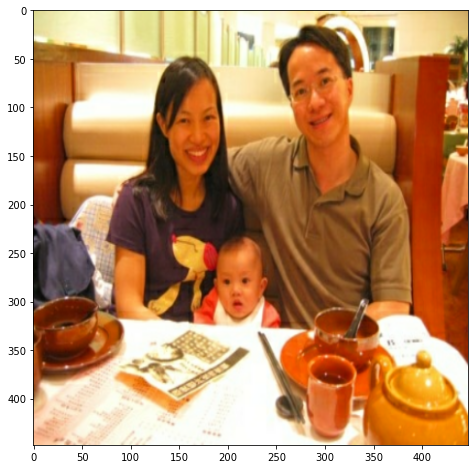

tf.Tensor(0.0, shape=(), dtype=float32)


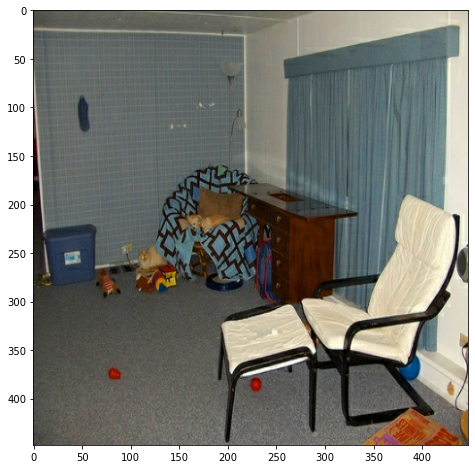

tf.Tensor(0.0, shape=(), dtype=float32)


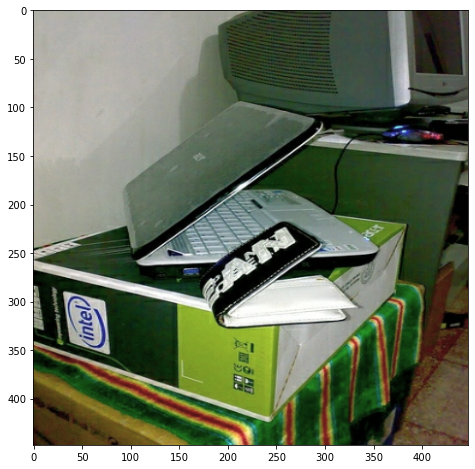

tf.Tensor(0.0, shape=(), dtype=float32)


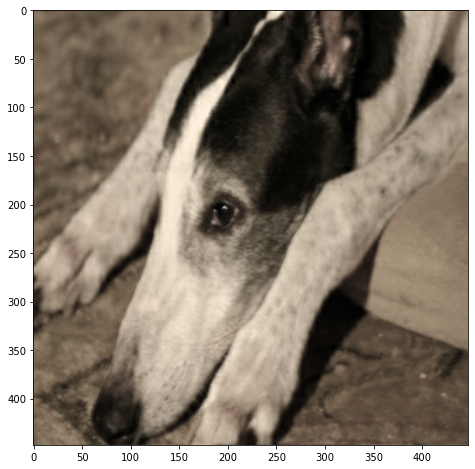

tf.Tensor(0.0, shape=(), dtype=float32)


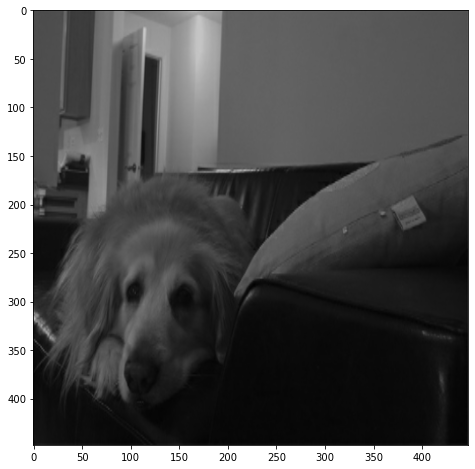

tf.Tensor(0.0, shape=(), dtype=float32)


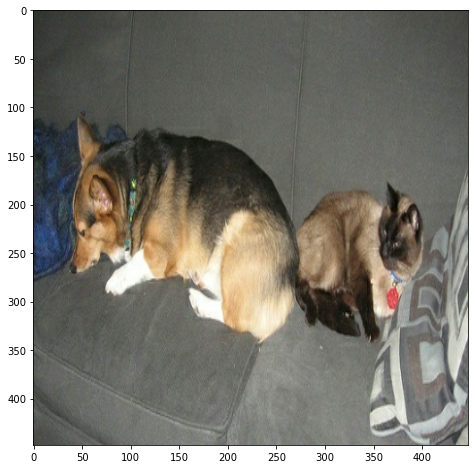

tf.Tensor(0.0, shape=(), dtype=float32)


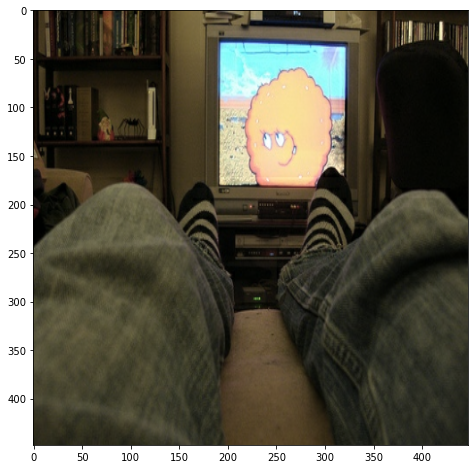

tf.Tensor(0.0, shape=(), dtype=float32)


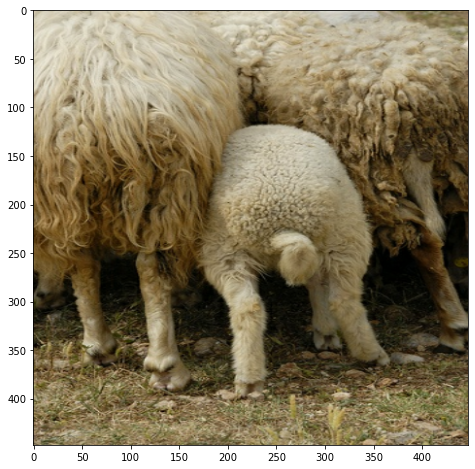

tf.Tensor(0.0, shape=(), dtype=float32)


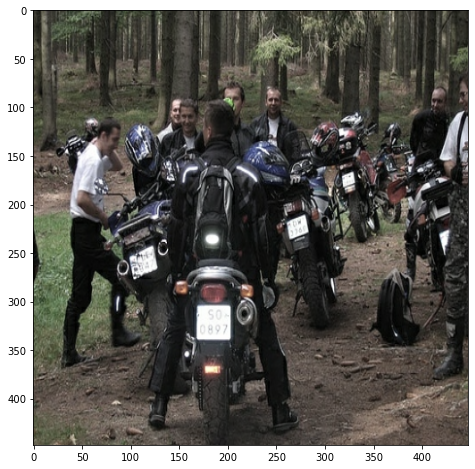

tf.Tensor(0.0, shape=(), dtype=float32)


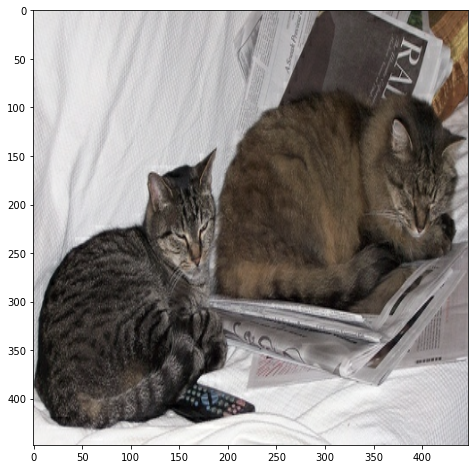

In [42]:
for i in train_ds.take(10):
    plt.figure(figsize=(8, 8))
    image = i[0][0].numpy()
    label = i[1]
    non_obj_cell = tf.where(label[:, :, :, 4] == 1., 0., 1.)[0][..., None]
    label = convert_to_origin(label, 448, 7)[0].numpy()
    
    label *= non_obj_cell
    print(tf.reduce_sum(label[..., 4:]))
    image = label_parse(label, image)
    plt.imshow(image)
    plt.show()

tf.Tensor(0.0, shape=(), dtype=float32)


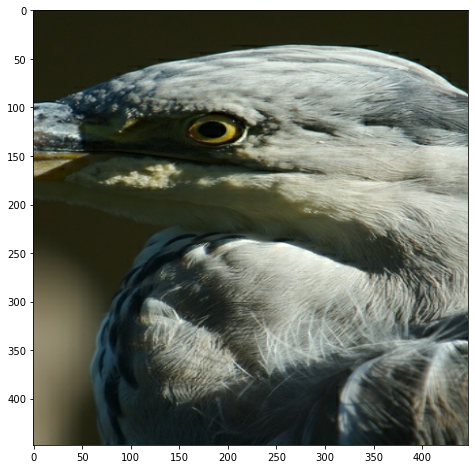

tf.Tensor(0.0, shape=(), dtype=float32)


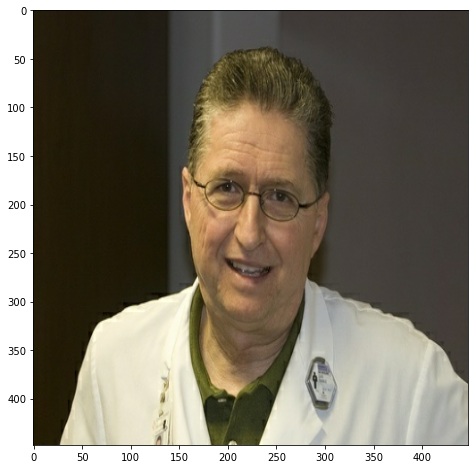

tf.Tensor(0.0, shape=(), dtype=float32)


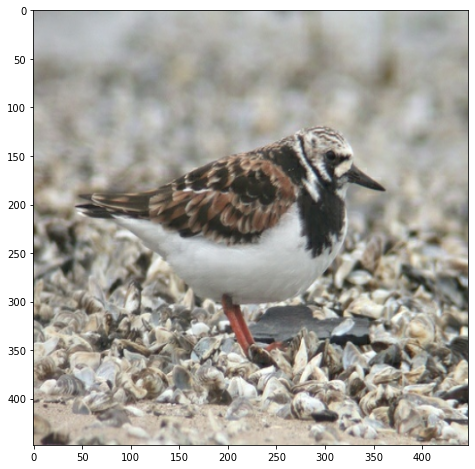

tf.Tensor(0.0, shape=(), dtype=float32)


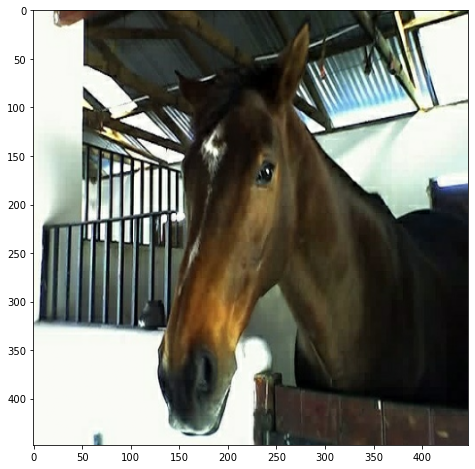

tf.Tensor(0.0, shape=(), dtype=float32)


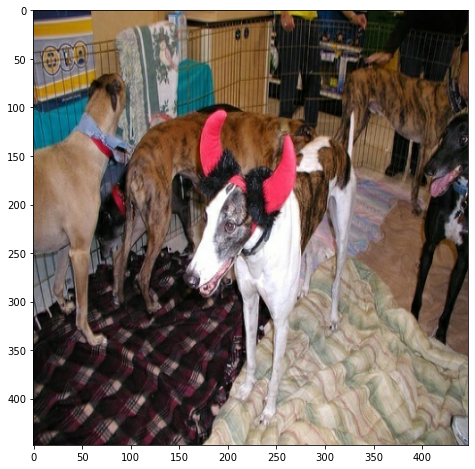

tf.Tensor(0.0, shape=(), dtype=float32)


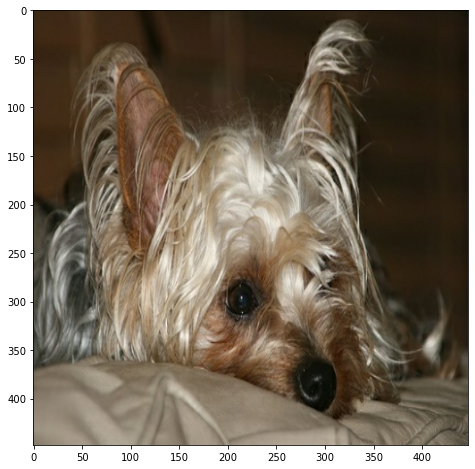

tf.Tensor(0.0, shape=(), dtype=float32)


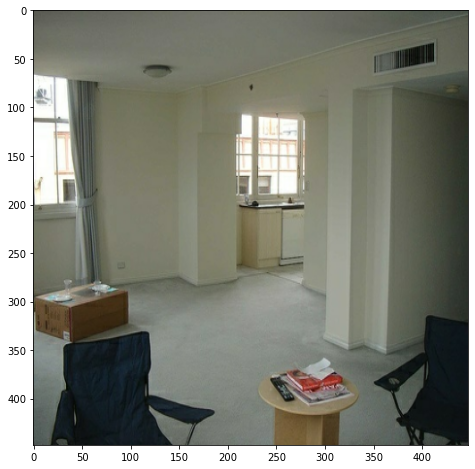

tf.Tensor(0.0, shape=(), dtype=float32)


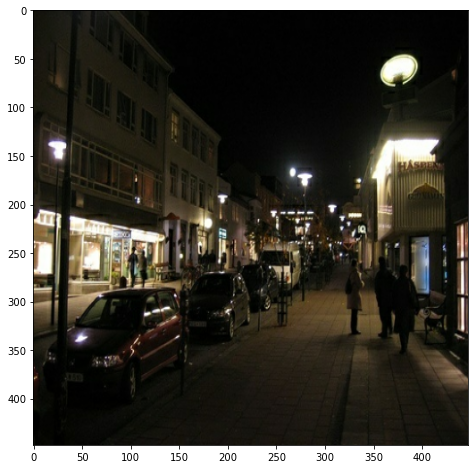

tf.Tensor(0.0, shape=(), dtype=float32)


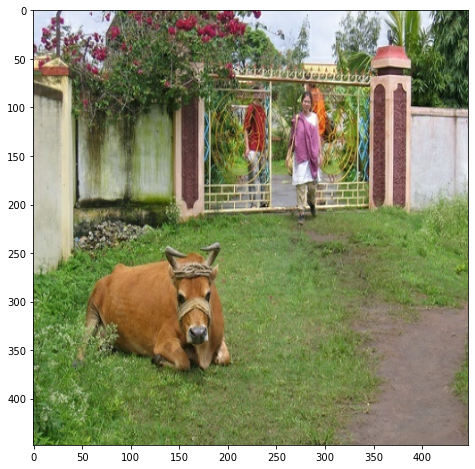

tf.Tensor(0.0, shape=(), dtype=float32)


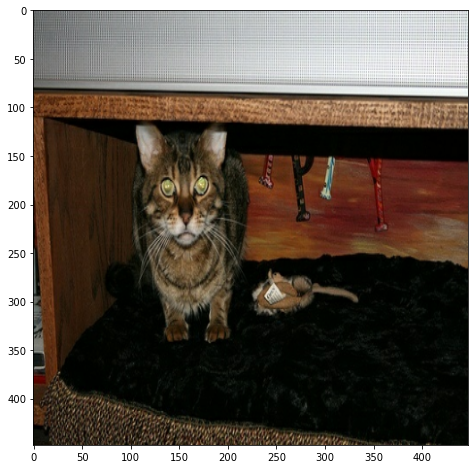

In [43]:
for i in val_ds.take(10):
    plt.figure(figsize=(8, 8))
    image = i[0][0].numpy()
    label = i[1]
    non_obj_cell = tf.where(label[:, :, :, 4] == 1., 0., 1.)[0][..., None]
    label = convert_to_origin(label, 448, 7)[0].numpy()
    
    label *= non_obj_cell
    print(tf.reduce_sum(label[..., 4:]))
    image = label_parse(label, image)
    plt.imshow(image)
    plt.show()

In [47]:
for i in train_ds.take(1):
    sample_label = i[1]

In [49]:
import tensorflow as tf


# convert to origin box value(about 224x224 size)
# input : box = [batch_size, 7, 7, 4], obj_cell = [batch_size, 7, 7, 1]
# output : converted boxes = [batch_size, 7, 7, 4]
def convert_to_origin(box, obj_cell, img_size, s):
    batch_size = tf.shape(box)[0]   # get batch size

    # cell nums
    cell_num = tf.linspace(0., float(s - 1), s)  # [0., 1., 2., 3., 4., 5. ,6.]
    y_cells = tf.zeros(shape=(batch_size, s, s)) + cell_num
    x_cells = tf.transpose(y_cells, perm=[0, 2, 1])

    # except none object cell
    x_cells *= obj_cell
    y_cells *= obj_cell

    converted_x = (x_cells * float(img_size // s)) + (box[:, :, :, 0] * float(img_size // s))   # origin center x
    converted_y = (y_cells * float(img_size // s)) + (box[:, :, :, 1] * float(img_size // s))   # origin center y
    converted_w = box[:, :, :, 2] * float(img_size)   # origin center w
    converted_h = box[:, :, :, 3] * float(img_size)   # origin center h
    return tf.stack([converted_x, converted_y, converted_w, converted_h], axis=-1)


# [x, y, w, h] --> [left_top_x, left_top_y, right_down_x, right_down_y]
# input : points = [batch_size, 7, 7, 4]
# output : corners = [batch_size, 7, 7, 4]
def convert_to_corner(points):
    return tf.concat(
        [points[..., :2] - points[..., 2:] / 2.0, points[..., :2] + points[..., 2:] / 2.0],
        axis=-1,
    )


# calculate intersection over union
# box = [x, y, w, h]
def calculate_iou(box1, box2):
    box1_corner = convert_to_corner(box1)   # get corner point
    box2_corner = convert_to_corner(box2)   # get corner point

    lu = tf.maximum(box1_corner[..., :2], box2_corner[..., :2])    # intersection left top
    rd = tf.minimum(box1_corner[..., 2:], box2_corner[...,  2:])    # intersection right down
    intersection = tf.maximum(tf.zeros_like(rd - lu), rd - lu)    # intersection width, height
    intersection_area = intersection[..., 0] * intersection[..., 1]

    box1_area = (box1[..., 2]) * (box1[..., 3])
    box2_area = (box2[..., 2]) * (box2[..., 3])
    union_area = tf.maximum(
        box1_area + box2_area - intersection_area, 1e-8
    )
    return tf.clip_by_value(intersection_area / union_area, 0.0, 1.0)


# get responsible_cell(where the cell idx is responsible)
# output : [batch_size, 7, 7, 2]
def get_responsible_cell(y_true, y_pred, obj_cell, img_size, s):
    box1 = y_pred[..., :4]
    box2 = y_pred[..., 5:9]
    # converted box_info
    converted_box1 = convert_to_origin(box1, obj_cell, img_size, s)
    converted_box2 = convert_to_origin(box2, obj_cell, img_size, s)

    gt_box = y_true[:, :, :, :4]   # ground truth box
    converted_gt_box = convert_to_origin(gt_box, obj_cell, img_size, s)   # converted box_info

    # get iou grid
    box1_iou = calculate_iou(converted_box1, converted_gt_box)   # [batch_size, 7, 7]
    box2_iou = calculate_iou(converted_box2, converted_gt_box)   # [batch_size, 7, 7]

    concat_iou = tf.stack([box1_iou, box2_iou], axis=-1)   # iou grid concat

    # if box1 more responsible or same confidence, and iou not 0
    box1_responsible = tf.where(concat_iou[..., 0] >= concat_iou[..., 1], 1., 0.) * obj_cell
    # if box2 more responsible
    box2_responsible = tf.where(concat_iou[..., 0] < concat_iou[..., 1], 1., 0.) * obj_cell
    return tf.stack([box1_responsible, box2_responsible], axis=-1), concat_iou


def get_yolo_loss(img_size, s):
    # yolo loss
    # return bach loss
    def yolo_loss(y_true, y_pred):
        # loss param setting
        coord = 5.
        noobj = 0.5

        # pred split
        x_point_pred = tf.stack([y_pred[:, :, :, 0], y_pred[:, :, :, 0 + 5]], axis=-1)
        y_point_pred = tf.stack([y_pred[:, :, :, 1], y_pred[:, :, :, 1 + 5]], axis=-1)
        w_point_pred = tf.stack([y_pred[:, :, :, 2], y_pred[:, :, :, 2 + 5]], axis=-1)
        w_point_pred = tf.maximum(w_point_pred, 1e-8)   # for sqrt
        h_point_pred = tf.stack([y_pred[:, :, :, 3], y_pred[:, :, :, 3 + 5]], axis=-1)
        h_point_pred = tf.maximum(h_point_pred, 1e-8)   # for sqrt
        c_point_pred = tf.stack([y_pred[:, :, :, 4], y_pred[:, :, :, 4 + 5]], axis=-1)
        class_pred = y_pred[:, :, :, 10:]

        # true split
        x_point_true = y_true[..., 0, None]
        y_point_true = y_true[..., 1, None]
        w_point_true = y_true[..., 2, None]
        h_point_true = y_true[..., 3, None]
        class_true = y_true[..., 5:]

        obj_cell = tf.where(y_true[:, :, :, 4] == 1., 1., 0.)   # where the cell idx is existed object
        responsible_cell, iou_scores = get_responsible_cell(y_true, y_pred, obj_cell,
                                                            img_size, s)   # where the cell idx is responsible
        non_obj_cell = tf.where(responsible_cell == 0., 1., 0.)   # where the cell idx is not responsible

        # x,y loss
        x_loss = tf.square(x_point_pred - x_point_true)
        y_loss = tf.square(y_point_pred - y_point_true)
        xy_loss = (x_loss + y_loss) * responsible_cell
        xy_loss = tf.reduce_sum(xy_loss, [1, 2, 3]) * coord

        # w,h loss
        w_loss = tf.square(tf.sqrt(w_point_pred) - tf.sqrt(w_point_true))
        h_loss = tf.square(tf.sqrt(h_point_pred) - tf.sqrt(h_point_true))
        wh_loss = (w_loss + h_loss) * responsible_cell
        wh_loss = tf.reduce_sum(wh_loss, [1, 2, 3]) * coord

        # confidence loss
        c_loss = tf.square(c_point_pred - iou_scores) * responsible_cell
        c_loss = tf.reduce_sum(c_loss, [1, 2, 3])

        # not object loss
        non_c_loss = tf.square(c_point_pred - 0.) * non_obj_cell
        non_c_loss = tf.reduce_sum(non_c_loss, [1, 2, 3]) * noobj

        # class loss
        class_loss = tf.square(class_pred - class_true)
        class_loss = tf.reduce_sum(class_loss, axis=-1) * obj_cell
        class_loss = tf.reduce_sum(class_loss, [1, 2])

        # total loss
        total_loss = xy_loss + wh_loss + c_loss + non_c_loss + class_loss
        total_loss = tf.reduce_mean(total_loss)   # batch loss
        return total_loss
    return yolo_loss

In [50]:
loss_func = get_yolo_loss(448, 7)

In [60]:
sample_out = tf.random.normal(shape=(1, 7, 7, 30))

In [61]:
loss = loss_func(sample_label, sample_out)

In [62]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=170.56885>